# WEB SCRAPING

### Importing Libraries:

In [473]:
import json
import requests
import pandas as pd
from bs4 import BeautifulSoup

### Getting clean data:

In [474]:
proc_data = pd.read_csv('../data/processed/CristopherRL_processed_data.csv', sep='|')

In [475]:
proc_data.head(10)

,position,id,FullName,worth_BUSD,worthChange_MUSD,Industry,Company,n_age,gender,image
0,1,8254,JEFF BEZOS,112.0,0.000,Technology,Amazon,54,Male,https://specials-images.forbesimg.com/imageser...
1,2,6688,BILL GATES,90.0,-0.001,Technology,Microsoft,62,Unknown,https://specials-images.forbesimg.com/imageser...
2,3,1904,WARREN BUFFETT,84.0,-0.002,Finance and Investments,Berkshire Hathaway,87,Male,https://specials-images.forbesimg.com/imageser...
3,4,4168,BERNARD ARNAULT,72.0,0.000,Fashion & Retail,LVMH,69,Male,https://specials-images.forbesimg.com/imageser...
4,5,7545,MARK ZUCKERBERG,71.0,0.000,Technology,Facebook,34,Male,https://specials-images.forbesimg.com/imageser...
5,6,2790,AMANCIO ORTEGA,70.0,0.000,Fashion & Retail,Zara,82,Male,https://specials-images.forbesimg.com/imageser...
6,7,8711,CARLOS SLIM HELU,67.1,0.001,Telecom,telecom,78,Male,https://specials-images.forbesimg.com/imageser...
7,8,1066,CHARLES KOCH,60.0,0.000,Diversified,Koch Industries,82,Male,https://specials-images.forbesimg.com/imageser...
8,9,5843,DAVID KOCH,60.0,0.000,Diversified,Koch Industries,78,Male,https://specials-images.forbesimg.com/imageser...
9,10,1718,LARRY ELLISON,58.5,-0.001,Technology,software,73,Unknown,https://specials-images.forbesimg.com/imageser...


### Enriching information:

#### > Importing Json from Forbes.com to get 'country'

In [476]:
forbes_url = 'https://www.forbes.com/ajax/list/data?year=2018&uri=billionaires&type=person'
df = pd.read_json(forbes_url, orient='records')
#id_country.head(20)
name_country = df[['name', 'country',]]
name_country.name = id_country.name.str.upper()
name_country.head(30) #Ill try to merge this table with proc_data

/home/cristopherrl/miniconda3/envs/proy_env/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,name,country
0,ABDULSAMAD RABIU,Nigeria
1,ADAM KWOK,Hong Kong
2,AIYAWATT SRIVADDHANAPRABHA & FAMILY,Thailand
3,ALCEU ELIAS FELDMANN,Brazil
4,ALDO BENSADOUN,Canada
5,ANANT ASAVABHOKIN,Thailand
6,ANDRÉ KASPRZAK,Denmark
7,ANNA KASPRZAK,Denmark
8,ANTHONY VON MANDL,Canada
9,ANTHONY WOOD,United States


In [477]:
enriched_data = pd.merge(proc_data, name_country, left_on='FullName', right_on='name')
enriched_data.drop('name', axis = 1)

,position,id,FullName,worth_BUSD,worthChange_MUSD,Industry,Company,n_age,gender,image,country
0,1,8254,JEFF BEZOS,112.0,0.000,Technology,Amazon,54,Male,https://specials-images.forbesimg.com/imageser...,United States
1,2,6688,BILL GATES,90.0,-0.001,Technology,Microsoft,62,Unknown,https://specials-images.forbesimg.com/imageser...,United States
2,3,1904,WARREN BUFFETT,84.0,-0.002,Finance and Investments,Berkshire Hathaway,87,Male,https://specials-images.forbesimg.com/imageser...,United States
3,4,4168,BERNARD ARNAULT,72.0,0.000,Fashion & Retail,LVMH,69,Male,https://specials-images.forbesimg.com/imageser...,France
4,5,7545,MARK ZUCKERBERG,71.0,0.000,Technology,Facebook,34,Male,https://specials-images.forbesimg.com/imageser...,United States
...,...,...,...,...,...,...,...,...,...,...,...
2176,2204,2301,ZHAO XIAOQIANG,1.0,0.000,Fashion & Retail,"fashion, entertainment",51,Unknown,https://specials-images.forbesimg.com/imageser...,China
2177,2205,5611,ZHOU LIANGZHANG,1.0,NaN,Manufacturing,electrical equipment,55,Male,https://specials-images.forbesimg.com/imageser...,China
2178,2206,3447,ZHU XINGMING,1.0,0.000,Manufacturing,electrical equipment,51,Male,https://specials-images.forbesimg.com/imageser...,China
2179,2207,1303,ZHUO JUN,1.0,0.000,Manufacturing,printed circuit boards,52,Female,https://specials-images.forbesimg.com/imageser...,Hong Kong


In [478]:
enriched_data.describe()

,position,id,worth_BUSD,worthChange_MUSD,n_age
count,2181.000000,2181.000000,2181.000000,2074.000000,2181.000000
mean,1108.280605,5369.745071,4.066804,-0.491049,89.565337
std,637.140995,2599.663368,6.863029,26.501218,153.539966
min,1.000000,1000.000000,1.000000,-672.311000,21.000000
25%,557.000000,3134.000000,1.400000,0.000000,54.000000
50%,1109.000000,5302.000000,2.200000,0.000000,64.000000
75%,1659.000000,7559.000000,4.000000,0.000000,74.000000
max,2208.000000,9978.000000,112.000000,530.206000,999.000000


### Aggregation of enriched data

In [479]:
#Its is a input
top = 100 #hasta 1000 funciona bien

#Considering all position values over 'top' value, grouping Worth by Country, and sorting values 
meanW_country = enriched_data[ enriched_data ['position'] <= top ].groupby('country')['worth_BUSD'].mean().sort_values(ascending=False)

#Converting 'Industry' as index to column, to represent in bar plot 
meanW_country = meanW_country.reset_index()
meanW_country.rename(columns={'worth_BUSD': 'mean_worth_BUSD'}, inplace=True)
meanW_country

,country,mean_worth_BUSD
0,Spain,70.000000
1,Mexico,42.200000
2,United States,38.970000
3,France,37.875000
4,Brazil,25.450000
5,China,25.310000
6,Canada,25.000000
7,Hong Kong,23.700000
8,India,23.000000
9,Austria,23.000000


In [480]:
country_list = list(meanW_country.country.unique())
country_list

['Spain',
 'Mexico',
 'United States',
 'France',
 'Brazil',
 'China',
 'Canada',
 'Hong Kong',
 'India',
 'Austria',
 'Germany',
 'Italy',
 'Philippines',
 'Japan',
 'South Korea',
 'Ireland',
 'Australia',
 'Indonesia',
 'Sweden',
 'Russia',
 'United Kingdom',
 'Thailand',
 'Chile',
 'Netherlands',
 'Czech Republic',
 'Malaysia',
 'Nigeria']

### WEBSCRAPING: Wikipedia > country code

In [481]:
url = 'https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes'
html = requests.get(url).content
soup = BeautifulSoup(html, "lxml")

In [482]:
table = soup.find_all('table',{'class':'wikitable sortable'})[0]
table

<table class="wikitable sortable">
<tbody><tr>
<th colspan="1"><a href="/wiki/ISO_3166" title="ISO 3166">ISO 3166</a><sup class="reference" id="cite_ref-ISO_3166_1-1"><a href="#cite_note-ISO_3166-1">[1]</a></sup>
</th>
<th rowspan="2"><a href="/wiki/State_(polity)" title="State (polity)">Official state name</a><sup class="reference" id="cite_ref-CIA_5-0"><a href="#cite_note-CIA-5">[5]</a></sup>
</th>
<th rowspan="2"><a href="/wiki/Sovereign_state" title="Sovereign state">Sovereignty</a><sup class="reference" id="cite_ref-CIA_5-1"><a href="#cite_note-CIA-5">[5]</a></sup><sup class="reference" id="cite_ref-UN_6-0"><a href="#cite_note-UN-6">[6]</a></sup><sup class="reference" id="cite_ref-NSG_7-0"><a href="#cite_note-NSG-7">[7]</a></sup>
</th>
<th colspan="3"><a href="/wiki/ISO_3166-1" title="ISO 3166-1">ISO 3166-1</a><sup class="reference" id="cite_ref-ISO_3166-1_2-1"><a href="#cite_note-ISO_3166-1-2">[2]</a></sup>
</th>
<th colspan="1"><a href="/wiki/ISO_3166-2" title="ISO 3166-2">ISO 3

In [483]:
# tr represent the table rows
rows = table.find_all('tr')
rows_parsed = [row.text for row in rows]
rows_parsed

['\nISO 3166[1]\n\nOfficial state name[5]\n\nSovereignty[5][6][7]\n\nISO 3166-1[2]\n\nISO 3166-2[3]\n\nInternet ccTLD[8]\n',
 '\nCountry name[9]\n\nAlpha-2 code[9]\n\nAlpha-3 code[9]\n\nNumeric code[9]\n\nSubdivision code links[3]\n',
 '\n\xa0Afghanistan\n\nThe Islamic Republic of Afghanistan\n\nUN member state\n\n.mw-parser-output .monospaced{font-family:monospace,monospace}AF\n\nAFG\n\n004\n\nISO 3166-2:AF\n\n.af\n',
 '\n\xa0Akrotiri and Dhekelia – See United Kingdom, The\n',
 '\n\xa0Åland Islands\n\nÅland\n\nFinland\n\nAX\n\nALA\n\n248\n\nISO 3166-2:AX\n\n.ax\n',
 '\n\xa0Albania\n\nThe Republic of Albania\n\nUN member state\n\nAL\n\nALB\n\n008\n\nISO 3166-2:AL\n\n.al\n',
 "\n\xa0Algeria\n\nThe People's Democratic Republic of Algeria\n\nUN member state\n\nDZ\n\nDZA\n\n012\n\nISO 3166-2:DZ\n\n.dz\n",
 '\n\xa0American Samoa\n\nThe Territory of American Samoa\n\nUnited States\n\nAS\n\nASM\n\n016\n\nISO 3166-2:AS\n\n.as\n',
 '\n\xa0Andorra\n\nThe Principality of Andorra\n\nUN member stat

In [484]:
import re

def smart_parser(row_text):
    
    row_text = row_text.replace('\n\n', '\n').strip('\n')
    
    #Erasing some exceptions
    row_text = re.sub('.mw-parser-output .monospaced{font-family:monospace,monospace}', '', row_text)
    row_text = re.sub('\[ah\]', '', row_text)
    row_text = re.sub('Hong Kong SAR, China', 'Hong Kong', row_text)
    
    return list(map(lambda x: x.strip(), row_text.split('\n')))

well_parsed = list(map(lambda x: smart_parser(x), rows_parsed))

well_parsed

[['ISO 3166[1]',
  'Official state name[5]',
  'Sovereignty[5][6][7]',
  'ISO 3166-1[2]',
  'ISO 3166-2[3]',
  'Internet ccTLD[8]'],
 ['Country name[9]',
  'Alpha-2 code[9]',
  'Alpha-3 code[9]',
  'Numeric code[9]',
  'Subdivision code links[3]'],
 ['Afghanistan',
  'The Islamic Republic of Afghanistan',
  'UN member state',
  'AF',
  'AFG',
  '004',
  'ISO 3166-2:AF',
  '.af'],
 ['Akrotiri and Dhekelia – See United Kingdom, The'],
 ['Åland Islands',
  'Åland',
  'Finland',
  'AX',
  'ALA',
  '248',
  'ISO 3166-2:AX',
  '.ax'],
 ['Albania',
  'The Republic of Albania',
  'UN member state',
  'AL',
  'ALB',
  '008',
  'ISO 3166-2:AL',
  '.al'],
 ['Algeria',
  "The People's Democratic Republic of Algeria",
  'UN member state',
  'DZ',
  'DZA',
  '012',
  'ISO 3166-2:DZ',
  '.dz'],
 ['American Samoa',
  'The Territory of American Samoa',
  'United States',
  'AS',
  'ASM',
  '016',
  'ISO 3166-2:AS',
  '.as'],
 ['Andorra',
  'The Principality of Andorra',
  'UN member state',
  'AD',
  '

In [485]:
for x in well_parsed:
    if len(x) != 8:
        well_parsed.remove(x) #only get list wich contains information about countries
    
well_parsed

[['Country name[9]',
  'Alpha-2 code[9]',
  'Alpha-3 code[9]',
  'Numeric code[9]',
  'Subdivision code links[3]'],
 ['Afghanistan',
  'The Islamic Republic of Afghanistan',
  'UN member state',
  'AF',
  'AFG',
  '004',
  'ISO 3166-2:AF',
  '.af'],
 ['Åland Islands',
  'Åland',
  'Finland',
  'AX',
  'ALA',
  '248',
  'ISO 3166-2:AX',
  '.ax'],
 ['Albania',
  'The Republic of Albania',
  'UN member state',
  'AL',
  'ALB',
  '008',
  'ISO 3166-2:AL',
  '.al'],
 ['Algeria',
  "The People's Democratic Republic of Algeria",
  'UN member state',
  'DZ',
  'DZA',
  '012',
  'ISO 3166-2:DZ',
  '.dz'],
 ['American Samoa',
  'The Territory of American Samoa',
  'United States',
  'AS',
  'ASM',
  '016',
  'ISO 3166-2:AS',
  '.as'],
 ['Andorra',
  'The Principality of Andorra',
  'UN member state',
  'AD',
  'AND',
  '020',
  'ISO 3166-2:AD',
  '.ad'],
 ['Angola',
  'The Republic of Angola',
  'UN member state',
  'AO',
  'AGO',
  '024',
  'ISO 3166-2:AO',
  '.ao'],
 ['Anguilla',
  'Anguilla',

In [486]:
colnames = ['Countries','b1','b2','2L','3L','b3','b4','b5']
data = well_parsed[1:]
country_codes = pd.DataFrame(data, columns=colnames)
country_codes.drop(columns = ['b1','b2','b3','b4','b5'], inplace=True)

In [487]:
country_codes

,Countries,2L,3L
0,Afghanistan,AF,AFG
1,Åland Islands,AX,ALA
2,Albania,AL,ALB
3,Algeria,DZ,DZA
4,American Samoa,AS,ASM
...,...,...,...
249,Wallis and Futuna,WF,WLF
250,Western Sahara,EH,ESH
251,Yemen,YE,YEM
252,Zambia,ZM,ZMB


In [488]:
meanW_country = pd.merge(meanW_country, country_codes, left_on='country', right_on='Countries')

In [489]:
meanW_country

,country,mean_worth_BUSD,Countries,2L,3L
0,Spain,70.000000,Spain,ES,ESP
1,Mexico,42.200000,Mexico,MX,MEX
2,Brazil,25.450000,Brazil,BR,BRA
3,China,25.310000,China,CN,CHN
4,Canada,25.000000,Canada,CA,CAN
5,Hong Kong,23.700000,Hong Kong,HK,HKG
6,India,23.000000,India,IN,IND
7,Austria,23.000000,Austria,AT,AUT
8,Germany,22.642857,Germany,DE,DEU
9,Italy,22.100000,Italy,IT,ITA


In [490]:
meanW_country.head()

,country,mean_worth_BUSD,Countries,2L,3L
0,Spain,70.00,Spain,ES,ESP
1,Mexico,42.20,Mexico,MX,MEX
2,Brazil,25.45,Brazil,BR,BRA
3,China,25.31,China,CN,CHN
4,Canada,25.00,Canada,CA,CAN


In [491]:
meanW_country.drop(columns = ['Countries'], inplace=True)

In [492]:
meanW_country

,country,mean_worth_BUSD,2L,3L
0,Spain,70.000000,ES,ESP
1,Mexico,42.200000,MX,MEX
2,Brazil,25.450000,BR,BRA
3,China,25.310000,CN,CHN
4,Canada,25.000000,CA,CAN
5,Hong Kong,23.700000,HK,HKG
6,India,23.000000,IN,IND
7,Austria,23.000000,AT,AUT
8,Germany,22.642857,DE,DEU
9,Italy,22.100000,IT,ITA


## API: World Bank > Getting info about GDP per country  

In [493]:
#Library pandas_datareader downloaded to use API in World Bank website
from pandas_datareader import wb
matches = wb.search('gdp.*capita.*const')

In [494]:
countries_GDP = list(meanW_country['2L'].unique())
countries_GDP

['ES',
 'MX',
 'BR',
 'CN',
 'CA',
 'HK',
 'IN',
 'AT',
 'DE',
 'IT',
 'JP',
 'IE',
 'ID',
 'SE',
 'TH',
 'CL',
 'MY',
 'NG']

In [495]:
WB_data = wb.download(indicator='NY.GDP.PCAP.CD', country = countries_GDP , start=2018, end=2018)
WB_data

,,NY.GDP.PCAP.CD
country,year,
Austria,2018,51461.954780
Brazil,2018,8920.762105
Canada,2018,46232.989623
Chile,2018,15923.358738
China,2018,9770.847088
Germany,2018,47603.027633
Spain,2018,30370.892325
"Hong Kong SAR, China",2018,48675.616460
Indonesia,2018,3893.596078


In [496]:
WB_data = WB_data.reset_index()
WB_data.drop('year',axis=1)
WB_data.rename(columns={'NY.GDP.PCAP.CD':'GDP_USD'}, inplace=True)
WB_data

,country,year,GDP_USD
0,Austria,2018,51461.954780
1,Brazil,2018,8920.762105
2,Canada,2018,46232.989623
3,Chile,2018,15923.358738
4,China,2018,9770.847088
5,Germany,2018,47603.027633
6,Spain,2018,30370.892325
7,"Hong Kong SAR, China",2018,48675.616460
8,Indonesia,2018,3893.596078
9,India,2018,2009.978857


In [497]:
WB_data.rename(columns={'NY.GDP.PCAP.CD':'GDP_USD', 'country':'country_gdp'}, inplace=True)

In [498]:
#There is a problem with Hong Kong, so I need to the the 'country' in case it's in the list

In [499]:
meanW_GDPP = pd.merge(meanW_country, WB_data, left_on='country', right_on='country_gdp')
meanW_GDPP

,country,mean_worth_BUSD,2L,3L,country_gdp,year,GDP_USD
0,Spain,70.000000,ES,ESP,Spain,2018,30370.892325
1,Mexico,42.200000,MX,MEX,Mexico,2018,9673.443674
2,Brazil,25.450000,BR,BRA,Brazil,2018,8920.762105
3,China,25.310000,CN,CHN,China,2018,9770.847088
4,Canada,25.000000,CA,CAN,Canada,2018,46232.989623
5,India,23.000000,IN,IND,India,2018,2009.978857
6,Austria,23.000000,AT,AUT,Austria,2018,51461.954780
7,Germany,22.642857,DE,DEU,Germany,2018,47603.027633
8,Italy,22.100000,IT,ITA,Italy,2018,34483.203999
9,Japan,19.900000,JP,JPN,Japan,2018,39289.958435


In [500]:
meanW_GDPP.drop( columns = ['year','country_gdp','3L'], inplace=True )

In [501]:
meanW_GDPP['ratio_MUSD'] = meanW_GDPP['mean_worth_BUSD']*1000000 / meanW_GDPP['GDP_USD'] 
meanW_GDPP.sort_values(by='ratio_MUSD', ascending=False, inplace =True)

In [502]:
meanW_GDPP.reset_index().drop( columns = ['index'], inplace=True )

# Analyzing Data

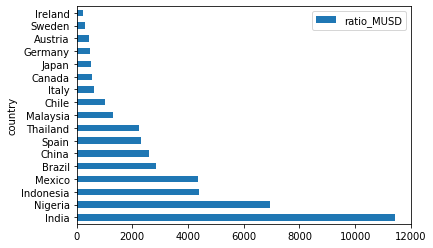

In [503]:
#import seaborn as sns
import matplotlib.pyplot as plt
meanW_GDPP.plot(kind='barh', x='country', y ='ratio_MUSD')

In [505]:
path = f'../data/results/Top{top}_Billionaries_by_Industry.png'
plt.savefig(path)

<Figure size 432x288 with 0 Axes>